In [1]:
#Importing necessary packages

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Importing dta from kaggle

data = pd.read_csv('ted_talks.csv')

# Exploring data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5701 entries, 0 to 5700
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   talk_id         5701 non-null   int64 
 1   title           5701 non-null   object
 2   speaker         5700 non-null   object
 3   recorded_date   5699 non-null   object
 4   published_date  5701 non-null   object
 5   event           5700 non-null   object
 6   duration        5701 non-null   int64 
 7   views           5701 non-null   int64 
 8   likes           5701 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 401.0+ KB


Data set has 9 columns of data, and 5701 rows. There is missing one entry of data in speaker column and event column, 2 missing entries in recorded date column. Five out of nine columns are categorical variables and four out of nine columns are numerical variables.

In [4]:
data.head()

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000


In [5]:
#Checking for NaN values:
data.isna().sum()

talk_id           0
title             0
speaker           1
recorded_date     2
published_date    0
event             1
duration          0
views             0
likes             0
dtype: int64

In [6]:
#Removing nan values, since there are only few of them missing.
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5697 entries, 0 to 5700
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   talk_id         5697 non-null   int64 
 1   title           5697 non-null   object
 2   speaker         5697 non-null   object
 3   recorded_date   5697 non-null   object
 4   published_date  5697 non-null   object
 5   event           5697 non-null   object
 6   duration        5697 non-null   int64 
 7   views           5697 non-null   int64 
 8   likes           5697 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 445.1+ KB


In the updated data 5697 entries have left.

**Adding calculated columns to the data**

In [8]:
#calculating percentage of like videos
data['like/view_ratio'] = round(data['likes']*100/data['views'],2)

In [9]:
data.head(3)

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000,2.99
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000,2.98
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000,2.99


**How long does it take from recording to publishing?**

In [10]:
from datetime import datetime as dt

In [11]:
data['recorded_date'] = pd.to_datetime(data['recorded_date'])

In [12]:
data['published_date'] = pd.to_datetime(data['published_date'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5697 entries, 0 to 5700
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   talk_id          5697 non-null   int64         
 1   title            5697 non-null   object        
 2   speaker          5697 non-null   object        
 3   recorded_date    5697 non-null   datetime64[ns]
 4   published_date   5697 non-null   datetime64[ns]
 5   event            5697 non-null   object        
 6   duration         5697 non-null   int64         
 7   views            5697 non-null   int64         
 8   likes            5697 non-null   int64         
 9   like/view_ratio  5697 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 489.6+ KB


In [14]:
data['date_dif'] = data['published_date']-data['recorded_date']
data['date_dif'] = data['date_dif']/np.timedelta64(1, 'D')
longest_process = data.sort_values('date_dif', ascending=False)
longest_process.head(10)

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio,date_dif
681,857,Why believe in others,Viktor Frankl,1972-05-14,2010-05-14,Toronto Youth Corps,262,1392109,41000,2.95,13879.0
625,784,Physics is fun to imagine,Richard Feynman,1983-07-08,2010-03-03,BBC TV,427,694414,20000,2.88,9735.0
199,230,"5 predictions, from 1984",Nicholas Negroponte,1984-02-02,2008-03-11,TED1984,1509,1119188,33000,2.95,8804.0
598,746,Growing up in the universe,Richard Dawkins,1991-12-20,2010-01-23,Royal Institution,3457,328255,9800,2.99,6609.0
201,231,My days as a young rebel,Frank Gehry,1990-03-03,2008-03-13,TED1990,2658,728017,21000,2.88,6585.0
1124,1346,Back to the future (of 1994),Danny Hillis,1994-02-20,2012-02-03,TED1994,1133,701655,21000,2.99,6557.0
392,474,Why not make video games for girls?,Brenda Laurel,1998-02-02,2009-03-02,TED1998,774,486580,14000,2.88,4046.0
379,455,Using design to make ideas new,Milton Glaser,1998-02-02,2009-02-11,TED1998,894,494547,14000,2.83,4027.0
373,443,Changing my legs - and my mindset,Aimee Mullins,1998-02-02,2009-01-28,TED1998,1229,1392400,41000,2.94,4013.0
313,379,Nature vs. humans,Paul MacCready,1998-02-02,2008-10-22,TED1998,1349,241810,7200,2.98,3915.0


In [15]:
data.describe()

,talk_id,duration,views,likes,like/view_ratio,date_dif
count,5697.000000,5697.000000,5.697000e+03,5.697000e+03,5697.000000,5697.000000
mean,26555.800246,706.348429,2.148582e+06,6.390496e+04,2.961882,311.448131
std,30517.861477,519.215070,3.712767e+06,1.098918e+05,0.041423,619.686200
min,1.000000,60.000000,4.560000e+02,1.300000e+01,2.730000,-578.000000
25%,1659.000000,354.000000,6.868990e+05,2.000000e+04,2.950000,29.000000
50%,10367.000000,680.000000,1.406351e+06,4.200000e+04,2.970000,94.000000
75%,51699.000000,925.000000,2.192573e+06,6.500000e+04,2.990000,232.000000
max,98843.000000,20404.000000,7.393596e+07,2.200000e+06,3.000000,13879.000000


Looking at the process_time seems like there is some mistakes in the data. min value is negative, which is not possible (recording can not be made after it is published). 

In [16]:
data['date_dif'].sort_values(ascending=True)

1185     -578.0
322      -348.0
324      -348.0
325      -335.0
321      -335.0
         ...   
201      6585.0
598      6609.0
199      8804.0
625      9735.0
681     13879.0
Name: date_dif, Length: 5697, dtype: float64

In [17]:
negative_processing  = data.loc[data['date_dif'] <0]
negative_processing

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio,date_dif
319,673,The balancing act of compassion,Jackie Tabick,2009-10-01,2008-10-31,TEDSalon 2008,929,230044,6900,3.00,-335.0
320,677,Expanding your circle of compassion,Robert Thurman,2009-10-01,2008-10-31,Chautauqua Institution,1071,375663,11000,2.93,-335.0
321,675,Compassion at the dinner table,James Forbes,2009-10-01,2008-10-31,Chautauqua Institution,1102,266966,8000,3.00,-335.0
322,679,The evolution of compassion,Robert Wright,2009-10-14,2008-10-31,TEDSalon 2009 Compassion,999,326362,9700,2.97,-348.0
324,676,"Lose your ego, find your compassion",Feisal Abdul Rauf,2009-10-14,2008-10-31,TEDSalon 2009 Compassion,990,613705,18000,2.93,-348.0
325,674,The profound journey of compassion,Dayananda Saraswati,2009-10-01,2008-10-31,Chautauqua Institution,1017,487253,14000,2.87,-335.0
611,765,Teach every child about food,Jamie Oliver,2010-02-20,2010-02-11,TED2010,1291,10459599,313000,2.99,-9.0
850,1338,"Know thyself, with a brain scanner",Ariel Garten,2011-09-23,2011-01-26,TEDxToronto 2011,887,512931,15000,2.92,-240.0
1185,1407,I am a pirate,Rick Falkvinge,2013-10-31,2012-04-01,TEDxOslo,1088,229095,6800,2.97,-578.0
1486,1728,Every kid needs a champion,Rita Pierson,2013-05-07,2013-05-03,TED Talks Education,454,14307132,429000,3.00,-4.0


In [18]:
negative_processing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 319 to 5536
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   talk_id          27 non-null     int64         
 1   title            27 non-null     object        
 2   speaker          27 non-null     object        
 3   recorded_date    27 non-null     datetime64[ns]
 4   published_date   27 non-null     datetime64[ns]
 5   event            27 non-null     object        
 6   duration         27 non-null     int64         
 7   views            27 non-null     int64         
 8   likes            27 non-null     int64         
 9   like/view_ratio  27 non-null     float64       
 10  date_dif         27 non-null     float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 2.5+ KB


There are quite a few values with negative dates difference. Looking more carefully in the data it seems like it just a mistakes by entering recording and published data into wrong columns. We could convert negative values of data difference to possitive, however, for later data analysis, recording and processing data again will give faulty information. Removing those 27 entires from the data. 

In [19]:
data = data[(data['date_dif']>0)]

In [20]:
data

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio,date_dif
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000,2.99,122.0
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000,2.98,123.0
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000,2.99,121.0
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000,2.99,125.0
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000,2.98,122.0
...,...,...,...,...,...,...,...,...,...,...,...
5693,98250,The community-building potential of the arts,Lily Yeh,2013-10-10,2022-10-07,TEDxCornellU,1344,8579,257,3.00,3284.0
5694,98591,Climate action's hidden opportunities for women,Zineb Sqalli,2022-09-15,2022-10-07,TED@BCG,734,495327,14000,2.83,22.0
5695,95723,The benefits of not being a jerk to yourself,Dan Harris,2022-04-10,2022-10-10,TED2022,819,574997,17000,2.96,183.0
5697,98662,4 ways to design a disability-friendly future,Meghan Hussey,2022-09-08,2022-10-11,TED Salon Bezos Scholars,544,310241,9300,3.00,33.0


Text(0, 0.5, 'Year of Publishing')

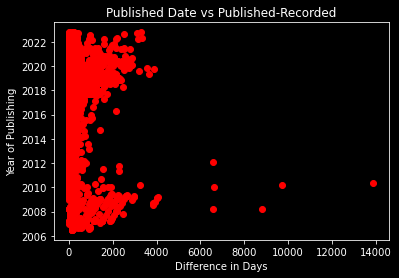

In [21]:

plt.style.use('dark_background')
plt.scatter(data['date_dif'], data['published_date'], c='red')
plt.title('Published Date vs Published-Recorded')
plt.xlabel('Difference in Days')
plt.ylabel('Year of Publishing')


In [22]:
#calculating the time from recorded date to published date
data['process_time'] = data['published_date']-data['recorded_date']

Text(0, 0.5, 'Percent (%)')

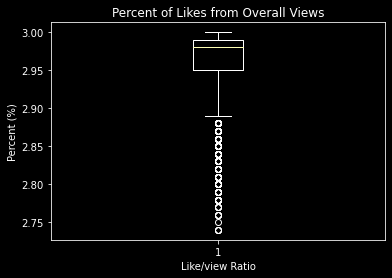

In [23]:
plt.style.use('dark_background')
plt.boxplot(data['like/view_ratio'])
plt.title('Percent of Likes from Overall Views')
plt.xlabel('Like/view Ratio')
plt.ylabel('Percent (%)')

Interesting! The highest value of view/like ratio is 3%. It means no matter how good or popular was TED recording, 97% or more viewers chooses not to press like button.

In [24]:
highest_ratio = data.sort_values('like/view_ratio', ascending=False)

In [25]:
highest_ratio.head(10)

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio,date_dif,process_time
2543,2768,What would happen if you didn't sleep?,Claudia Aguirre,2015-11-12,2017-09-07,TED-Ed,259,14277093,428000,3.0,665.0,665 days
3122,19995,"""Dead Romance""",Boy Girl Banjo,2017-11-16,2018-07-20,TEDNYC,212,313522,9400,3.0,246.0,246 days
3109,16779,Un ejército de mujeres,Alba Sotorra,2016-11-19,2018-07-18,TEDxReus,1177,18325,549,3.0,606.0,606 days
3105,15696,¿A quién pertenece el pasado?,Alberto Garín,2015-01-20,2018-07-18,TEDxUFM,799,23983,719,3.0,1275.0,1275 days
3103,15697,Nuestras mentiras en la vida y en los negocios,Néstor Guerra,2017-05-12,2018-07-18,TEDxTarragona,871,26715,801,3.0,432.0,432 days
3083,19756,A new way to remove CO2 from the atmosphere,Jennifer Wilcox,2018-04-10,2018-07-05,TED2018,846,3668115,110000,3.0,86.0,86 days
3081,20086,How do you define yourself?,Lizzie Velásquez,2013-12-05,2018-07-03,TEDxAustinWomen,791,12980784,389000,3.0,1671.0,1671 days
3074,18512,What causes hallucinations?,Elizabeth Cox,2018-06-26,2018-06-28,TED-Ed,328,4506023,135000,3.0,2.0,2 days
881,1093,How to keep rivers and streams flowing,Rob Harmon,2010-11-04,2011-03-11,TEDxRainier,509,700860,21000,3.0,127.0,127 days
3063,18469,The nightmare videos of children's YouTube -- ...,James Bridle,2018-04-10,2018-06-22,TED2018,982,7707981,231000,3.0,73.0,73 days


In [26]:
lowest_ratio = data.sort_values('like/view_ratio', ascending=True)

In [27]:
lowest_ratio.head(10)

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio,date_dif,process_time
1119,1341,What happens inside those massive warehouses?,Mick Mountz,2011-06-28,2012-01-29,TEDxBoston 2011,717,364825,10000,2.74,215.0,215 days
1047,1263,The right to understand,Sandra Fisher-Martins,2011-03-21,2011-11-06,TEDxO'Porto,931,365319,10000,2.74,230.0,230 days
1152,1372,A census of the ocean,Paul Snelgrove,2011-07-14,2012-02-28,TEDGlobal 2011,990,365491,10000,2.74,229.0,229 days
2983,13028,The hardest step in innovation? Looking foolis...,Jack Levis,2015-09-02,2018-05-04,TED@UPS,599,36463,1000,2.74,975.0,975 days
4051,46594,A global initiative to end violence against ch...,Howard Taylor,2019-07-20,2019-09-05,TEDSummit 2019,665,36314,1000,2.75,47.0,47 days
4341,57418,Tiny robots with giant potential,Paul McEuen and Marc Miskin,2019-11-01,2020-02-04,TED@NAS,781,362244,10000,2.76,95.0,95 days
3365,27951,What makes a superhero?,Stan Lee,2013-12-08,2018-11-14,TEDxGateway,475,362180,10000,2.76,1802.0,1802 days
1053,1268,6 ways to save the internet,Roger McNamee,2011-03-02,2011-11-12,TEDxSantaCruz,924,398711,11000,2.76,255.0,255 days
737,931,The case for same-sex marriage,Diane J. Savino,2009-12-02,2010-08-17,New York State Senate,453,362602,10000,2.76,258.0,258 days
5526,90834,How to heal a divided world,Michèle Lamont,2021-12-01,2022-04-29,TEDWomen 2021,962,362287,10000,2.76,149.0,149 days


**Most liked recordings**

In [28]:
most_likes = data.sort_values('likes', ascending=False)

In [29]:
most_likes.head(10)

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio,date_dif,process_time
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000,2.98,122.0,122 days
2150,2458,Inside the mind of a master procrastinator,Tim Urban,2016-02-16,2016-03-15,TED2016,834,63543965,1900000,2.99,28.0,28 days
1339,1569,Your body language may shape who you are,Amy Cuddy,2012-06-26,2012-10-01,TEDGlobal 2012,1245,66163329,1900000,2.87,97.0,97 days
672,848,How great leaders inspire action,Simon Sinek,2009-09-17,2010-05-04,TEDxPuget Sound,1067,60129500,1800000,2.99,229.0,229 days
831,1042,The power of vulnerability,Brené Brown,2010-06-06,2010-12-23,TEDxHouston,1202,59438598,1700000,2.86,200.0,200 days
1768,2034,How to speak so that people want to listen,Julian Treasure,2013-06-10,2014-06-27,TEDGlobal 2013,584,51709191,1500000,2.90,382.0,382 days
1940,2225,The next outbreak? We're not ready,Bill Gates,2015-03-18,2015-04-03,TED2015,503,44248349,1300000,2.94,16.0,16 days
2904,13587,My philosophy for a happy life,Sam Berns,2013-10-25,2018-03-28,TEDxMidAtlantic 2013,765,45113426,1300000,2.88,1615.0,1615 days
2100,2399,What makes a good life? Lessons from the longe...,Robert Waldinger,2015-11-14,2015-12-23,TEDxBeaconStreet,757,43270567,1200000,2.77,39.0,39 days
449,549,10 things you didn't know about orgasm,Mary Roach,2009-02-06,2009-05-20,TED2009,983,39330527,1100000,2.80,103.0,103 days


After evaluating views/likes ratio and most liked recordings we see interesting data. 


**Exploring each column of the data**

Data set does not have genre cattegory which could be very helpfull in the analysis. Instead of genre we can check most common words or phrases used in the data set and see if it gives us any idea about the most common topics.

**Exploring TED talk titles**

In [30]:
#The goal is to calculate most common words used in the titles.

from collections import Counter
from itertools import chain

title=Counter(" ".join(data["title"]).split()).most_common(100)

In [31]:
import nltk
from nltk.corpus import stopwords

stopwords=stopwords.words('english')

In [32]:
title

[('the', 1163),
 ('of', 1117),
 ('to', 1044),
 ('The', 981),
 ('How', 872),
 ('a', 647),
 ('and', 594),
 ('A', 415),
 ('in', 410),
 ('for', 367),
 ('Why', 330),
 ('we', 316),
 ('What', 306),
 ('your', 273),
 ('can', 269),
 ('is', 248),
 ('--', 246),
 ('you', 239),
 ('from', 188),
 ('that', 177),
 ('I', 177),
 ('about', 170),
 ('with', 156),
 ('on', 155),
 ('future', 134),
 ('our', 133),
 ('life', 121),
 ('world', 114),
 ('it', 113),
 ('new', 109),
 ('do', 101),
 ('change', 100),
 ('how', 99),
 ('be', 98),
 ('are', 91),
 ('help', 90),
 ('an', 88),
 ('My', 86),
 ('climate', 82),
 ('could', 81),
 ('power', 80),
 ('at', 80),
 ('us', 79),
 ('make', 79),
 ('need', 78),
 ('Can', 76),
 ('people', 72),
 ('should', 69),
 ('art', 68),
 ('brain', 68),
 ('what', 68),
 ('An', 66),
 ('my', 65),
 ('3', 64),
 ('more', 62),
 ('better', 62),
 ('ways', 58),
 ('way', 58),
 ('work', 58),
 ('not', 57),
 ('...', 57),
 ('science', 56),
 ('like', 56),
 ('story', 54),
 ('human', 54),
 ('get', 52),
 ('health', 51

In [33]:
#checking and removing stopwords, punctuation, numbers:

In [34]:
type(stopwords)

list

In [35]:
# import string library function 
import string 
    
# Storing the sets of punctuation in variable result 
result = string.punctuation 
    
# Printing the punctuation values 
print(result)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [36]:
result

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
articles = ['the', 'a', "The", "A"]
numbers = ['3']
symbols = ['-','--', '...']

In [38]:
stopwords.extend(articles)
stopwords.extend(result)
stopwords.extend(numbers)
stopwords.extend(symbols)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
for word, count in title:
    if word not in stopwords:
        print(count, word)
      


872 How
330 Why
306 What
177 I
134 future
121 life
114 world
109 new
100 change
90 help
86 My
82 climate
81 could
80 power
79 us
79 make
78 need
76 Can
72 people
68 art
68 brain
66 An
62 better
58 ways
58 way
58 work
56 science
56 like
54 story
54 human
52 get
51 health
49 time
48 global
47 data
46 women
46 US
45 history
43 Let's
43 fight
43 kids
43 love
43 good
42 teach
41 design
41 secret
41 music
41 one
41 solve
40 next
40 know
40 build
39 makes
38 end
38 We
37 (and


In [40]:
questions = ['How', "Why", "What"]
stopwords.extend(questions)

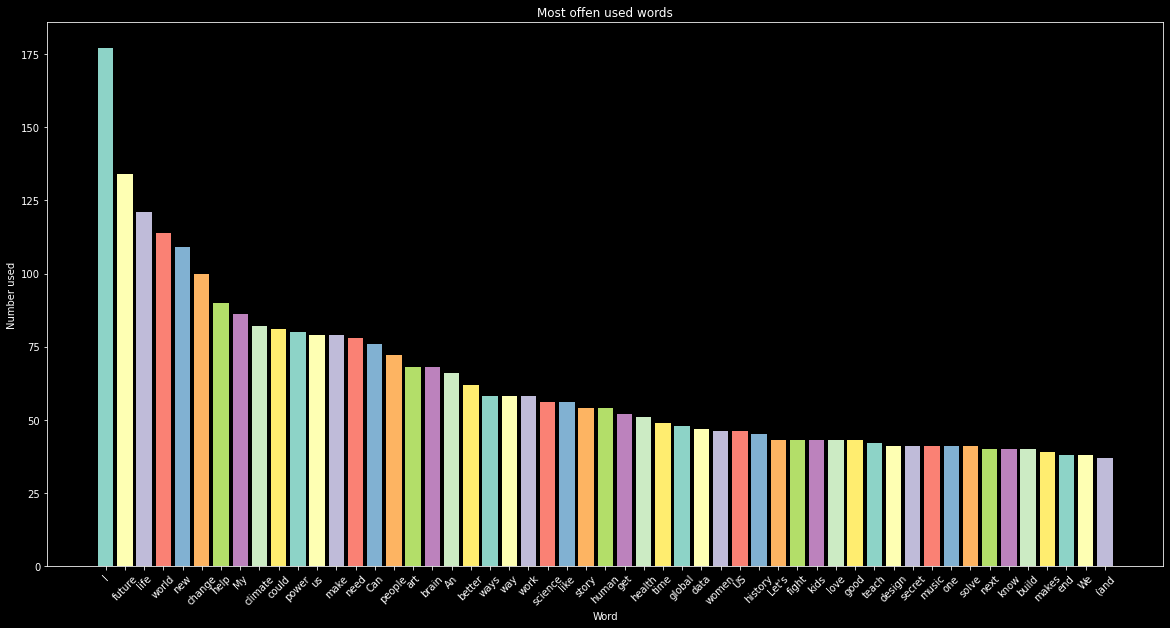

In [41]:
for word, count in title:
    if word not in stopwords:
        plt.rcParams['figure.figsize'] = (20, 10)
        plt.bar(word,count)
        plt.title('Most offen used words')
        plt.xticks(rotation = 45)
        plt.xlabel('Word')
        plt.ylabel("Number used")
plt.show()

In [42]:
top_speakers = data['speaker'].value_counts()
print(top_speakers)

Alex Gendler              19
Juan Enriquez             11
Greg Gage                  9
Hans Rosling               9
Emma Bryce                 9
                          ..
Theaster Gates             1
Dame Stephanie Shirley     1
Daniel Kish                1
Kevin Rudd                 1
Riley Moynes               1
Name: speaker, Length: 4285, dtype: int64


In [43]:
top_speakers = pd.DataFrame(top_speakers)

In [44]:
top_speakers.head(21)

,speaker
Alex Gendler,19
Juan Enriquez,11
Greg Gage,9
Hans Rosling,9
Emma Bryce,9
Bill Gates,8
Al Gore,7
Iseult Gillespie,7
Marco Tempest,7
Dan Ariely,6


What topics top speakers speak about and how long their videos are?


**Alex Gendler**

In [45]:
Alex_Gendler  = data.loc[data['speaker'] == 'Alex Gendler']

In [46]:
Alex_Gendler

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio,date_dif,process_time
2532,2752,Why elephants never forget,Alex Gendler,2014-11-13,2017-09-07,TED-Ed,307,8410106,252000,3.00,1029.0,1029 days
3389,27696,Can you solve the giant iron riddle?,Alex Gendler,2018-11-27,2018-11-28,TED-Ed,175,2342222,70000,2.99,1.0,1 days
3538,24036,Why do we cry? The three types of tears,Alex Gendler,2014-02-26,2019-02-12,TED-Ed,223,6813886,204000,2.99,1812.0,1812 days
3539,24060,How tsunamis work,Alex Gendler,2014-04-24,2019-02-12,TED-Ed,201,7938739,238000,3.00,1755.0,1755 days
3542,24445,Can you solve the three gods riddle?,Alex Gendler,2017-02-21,2019-02-12,TED-Ed,280,11783824,353000,3.00,721.0,721 days
3572,24205,The wars that inspired Game of Thrones,Alex Gendler,2015-05-11,2019-02-15,TED-Ed,345,6211191,186000,2.99,1376.0,1376 days
3574,24260,Can you solve the prisoner hat riddle?,Alex Gendler,2015-10-05,2019-02-15,TED-Ed,259,25702854,771000,3.00,1229.0,1229 days
3579,24249,Can you solve the bridge riddle?,Alex Gendler,2015-09-01,2019-02-15,TED-Ed,214,20395671,611000,3.00,1263.0,1263 days
3609,23928,Myths and misconceptions about evolution,Alex Gendler,2013-07-08,2019-02-22,TED-Ed,247,2805206,84000,2.99,2055.0,2055 days
3611,24220,Can you solve the famously difficult green-eye...,Alex Gendler,2015-06-16,2019-02-22,TED-Ed,267,14061280,421000,2.99,1347.0,1347 days


In [47]:
Alex_Gendler.sort_values('likes', ascending=False)

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio,date_dif,process_time
3574,24260,Can you solve the prisoner hat riddle?,Alex Gendler,2015-10-05,2019-02-15,TED-Ed,259,25702854,771000,3.00,1229.0,1229 days
3579,24249,Can you solve the bridge riddle?,Alex Gendler,2015-09-01,2019-02-15,TED-Ed,214,20395671,611000,3.00,1263.0,1263 days
3611,24220,Can you solve the famously difficult green-eye...,Alex Gendler,2015-06-16,2019-02-22,TED-Ed,267,14061280,421000,2.99,1347.0,1347 days
3542,24445,Can you solve the three gods riddle?,Alex Gendler,2017-02-21,2019-02-12,TED-Ed,280,11783824,353000,3.00,721.0,721 days
3689,24474,Can you solve the pirate riddle?,Alex Gendler,2017-05-01,2019-03-15,TED-Ed,309,9783002,293000,2.99,683.0,683 days
2532,2752,Why elephants never forget,Alex Gendler,2014-11-13,2017-09-07,TED-Ed,307,8410106,252000,3.00,1029.0,1029 days
3539,24060,How tsunamis work,Alex Gendler,2014-04-24,2019-02-12,TED-Ed,201,7938739,238000,3.00,1755.0,1755 days
3538,24036,Why do we cry? The three types of tears,Alex Gendler,2014-02-26,2019-02-12,TED-Ed,223,6813886,204000,2.99,1812.0,1812 days
3572,24205,The wars that inspired Game of Thrones,Alex Gendler,2015-05-11,2019-02-15,TED-Ed,345,6211191,186000,2.99,1376.0,1376 days
3699,24303,History vs. Napoleon Bonaparte,Alex Gendler,2016-02-04,2019-03-15,TED-Ed,306,4801872,144000,3.00,1135.0,1135 days


In [48]:
title = Alex_Gendler['title']
likes = Alex_Gendler['likes']

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Why elephants never forget'),
  Text(1, 0, 'Can you solve the giant iron riddle? '),
  Text(2, 0, 'Why do we cry? The three types of tears'),
  Text(3, 0, 'How tsunamis work'),
  Text(4, 0, 'Can you solve the three gods riddle?'),
  Text(5, 0, 'The wars that inspired Game of Thrones'),
  Text(6, 0, 'Can you solve the prisoner hat riddle?'),
  Text(7, 0, 'Can you solve the bridge riddle?'),
  Text(8, 0, 'Myths and misconceptions about evolution'),
  Text(9, 0, 'Can you solve the famously difficult green-eyed logic puzzle?'),
  Text(10, 0, 'Can you solve the pirate riddle?'),
  Text(11, 0, 'History vs. Napoleon Bonaparte'),
  Text(12, 0, 'History vs. Christopher Columbus'),
  Text(13, 0, 'A day in the life of a Cossack warrior'),
  Text(14, 0, 'How does impeachment work?'),
  Text(15, 0, 'Can you solve the dragon jousting riddle?'),
  Text(16, 0, 'Everything changed when the fire c

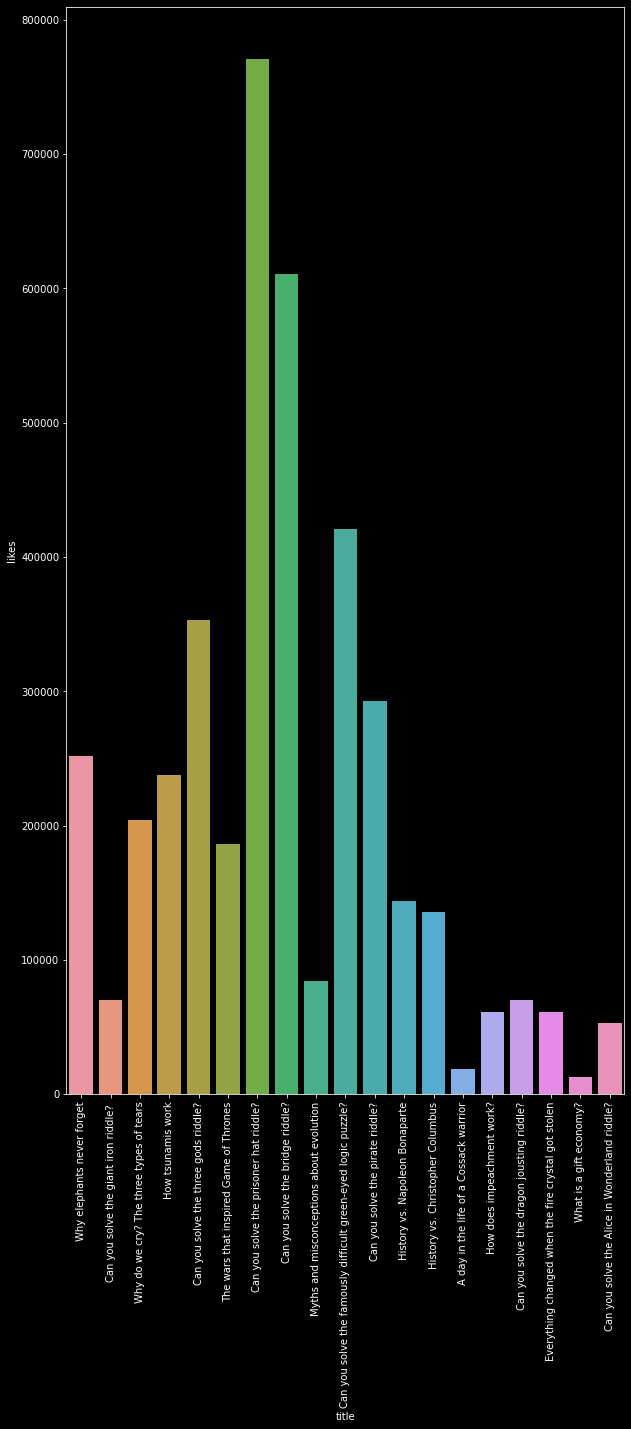

In [49]:

plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (10,20)
sns.barplot('title', 'likes', data=Alex_Gendler)
plt.xticks(rotation=90)

Two top liked titles from this author are:<br> "Can you solve the prisoner hat riddle?"<br>"Can you solve bridge riddle?"

**Juan Enriquez**

In [50]:
Juan_Enriquez  = data.loc[data['speaker'] == 'Juan Enriquez']
Juan_Enriquez.sort_values('likes', ascending=False)

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio,date_dif,process_time
382,463,The next species of human,Juan Enriquez,2009-02-04,2009-02-17,TED2009,1116,3659276,109000,2.98,13.0,13 days
2318,2632,What will humans look like in 100 years?,Juan Enriquez,2016-06-26,2016-11-22,TEDSummit,935,3252005,97000,2.98,149.0,149 days
2177,2473,We can reprogram life. How to do it wisely,Juan Enriquez,2015-11-06,2016-04-20,TED Talks Live,879,2163743,64000,2.96,166.0,166 days
3588,33924,The age of genetic wonder,Juan Enriquez,2018-11-20,2019-02-15,TEDxCERN,1076,2112609,63000,2.98,87.0,87 days
1244,1467,Will our kids be a different species?,Juan Enriquez,2012-04-26,2012-06-04,TEDxSummit,991,2060693,61000,2.96,39.0,39 days
4108,50657,A personal plea for humanity at the US-Mexico ...,Juan Enriquez,2019-09-10,2019-10-09,TED Salon Border Stories,606,2034440,61000,3.00,29.0,29 days
1485,1730,"Your online life, permanent as a tattoo",Juan Enriquez,2013-02-26,2013-05-02,TED2013,343,1914835,57000,2.98,65.0,65 days
4967,71407,How technology changes our sense of right and ...,Juan Enriquez,2020-11-01,2021-02-04,TED2020,435,1638182,49000,2.99,95.0,95 days
160,193,Using biology to rethink the energy challenge,Juan Enriquez,2007-09-09,2007-11-15,TEDSalon 2007 Hot Science,1071,1518136,45000,2.96,67.0,67 days
74,80,The life code that will reshape the future,Juan Enriquez,2003-02-02,2007-04-05,TED2003,1326,854664,25000,2.93,1523.0,1523 days


In [51]:
title = Juan_Enriquez['title']
likes = Juan_Enriquez['likes']

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'The life code that will reshape the future'),
  Text(1, 0, 'Using biology to rethink the energy challenge'),
  Text(2, 0, 'The next species of human'),
  Text(3, 0, 'Will our kids be a different species?'),
  Text(4, 0, 'Your online life, permanent as a tattoo'),
  Text(5, 0, 'We can reprogram life. How to do it wisely'),
  Text(6, 0, 'What will humans look like in 100 years?'),
  Text(7, 0, 'La selección latinoamericana de cerebros'),
  Text(8, 0, 'The age of genetic wonder'),
  Text(9, 0, 'A personal plea for humanity at the US-Mexico border'),
  Text(10, 0, 'How technology changes our sense of right and wrong')])

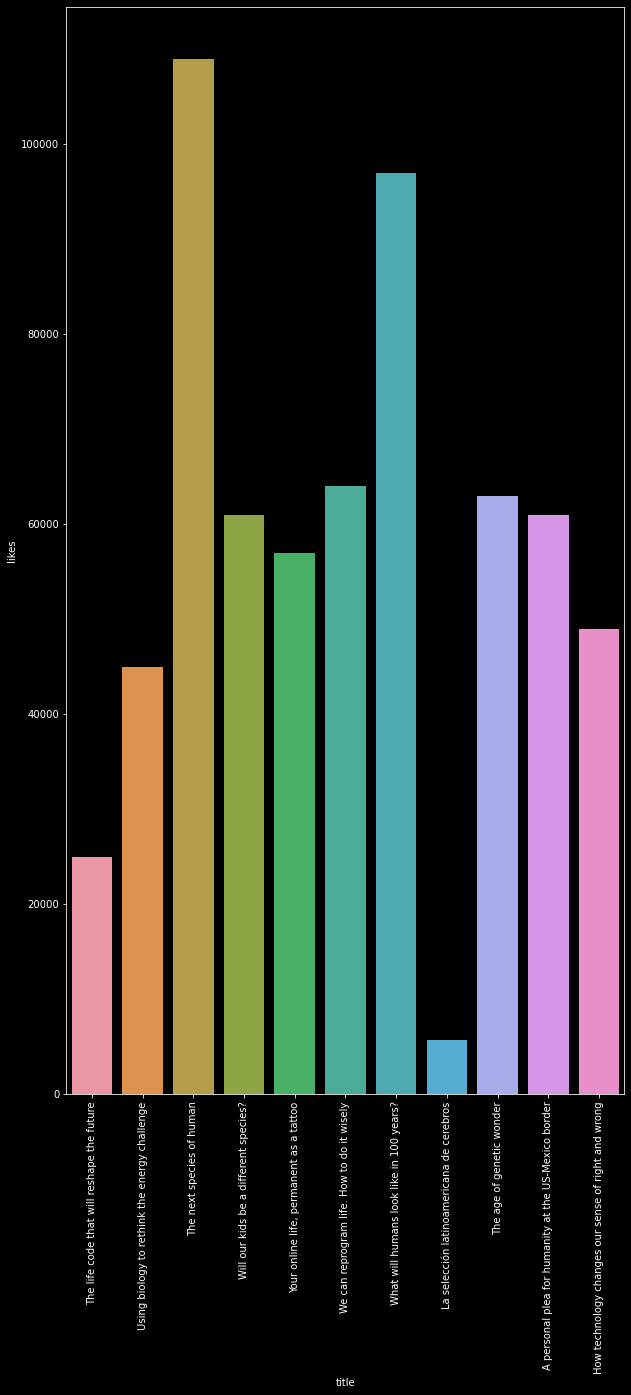

In [52]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (10,20)
sns.barplot('title', 'likes', data=Juan_Enriquez)
plt.xticks(rotation=90)

**Greg Gage, Hans Rosling, Emma Bryce**

In [53]:
Gage_Roslin_Bryce  = data.loc[(data['speaker'] == 'Greg Gage')|(data['speaker']=='Hans Rosling')|(data['speaker']=='Emma Bryce')]
Gage_Roslin_Bryce.sort_values('likes', ascending=False)

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio,date_dif,process_time
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000,2.99,125.0,125 days
1956,2244,How to control someone else's arm with your brain,Greg Gage,2015-03-18,2015-04-28,TED2015,342,13042459,391000,3.00,41.0,41 days
3640,24466,Why do we itch?,Emma Bryce,2017-04-11,2019-03-01,TED-Ed,269,6617394,198000,2.99,689.0,689 days
2538,2756,What really happens to the plastic you throw a...,Emma Bryce,2015-04-21,2017-09-07,TED-Ed,232,5236709,157000,3.00,870.0,870 days
721,912,"Global population growth, box by box",Hans Rosling,2010-06-21,2010-07-09,TED@Cannes,587,4719121,141000,2.99,18.0,18 days
2576,3013,Electrical experiments with plants that count ...,Greg Gage,2017-04-24,2017-10-10,TED2017,560,4377695,131000,2.99,169.0,169 days
4241,24558,How does the immune system work?,Emma Bryce,2018-01-08,2019-12-18,TED-Ed,308,4228825,126000,2.98,709.0,709 days
4242,24324,The power of the placebo effect,Emma Bryce,2016-04-04,2019-12-18,TED-Ed,262,4183144,125000,2.99,1353.0,1353 days
3725,24230,What is a calorie?,Emma Bryce,2015-07-13,2019-03-22,TED-Ed,236,4088694,122000,2.98,1348.0,1348 days
116,140,New insights on poverty,Hans Rosling,2007-03-03,2007-06-25,TED2007,1123,3939268,118000,3.00,114.0,114 days


In [54]:
title = Gage_Roslin_Bryce['title']
likes = Gage_Roslin_Bryce['likes']

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, "The best stats you've ever seen"),
  Text(1, 0, 'New insights on poverty'),
  Text(2, 0, 'Insights on HIV, in stunning data visuals'),
  Text(3, 0, 'Let my dataset change your mindset'),
  Text(4, 0, "Asia's rise -- how and when"),
  Text(5, 0, 'Global population growth, box by box'),
  Text(6, 0, "The good news of the decade? We're winning the war against child mortality"),
  Text(7, 0, 'The magic washing machine'),
  Text(8, 0, 'The cockroach beatbox'),
  Text(9, 0, 'Religions and babies'),
  Text(10, 0, "How to control someone else's arm with your brain"),
  Text(11, 0, 'What really happens to the plastic you throw away?'),
  Text(12, 0, 'Electrical experiments with plants that count and communicate'),
  Text(13, 0, 'How octopuses battle each other'),
  Text(14, 0, 'This computer is learning to read your mind '),
  Text(15, 0, 'The real reason w

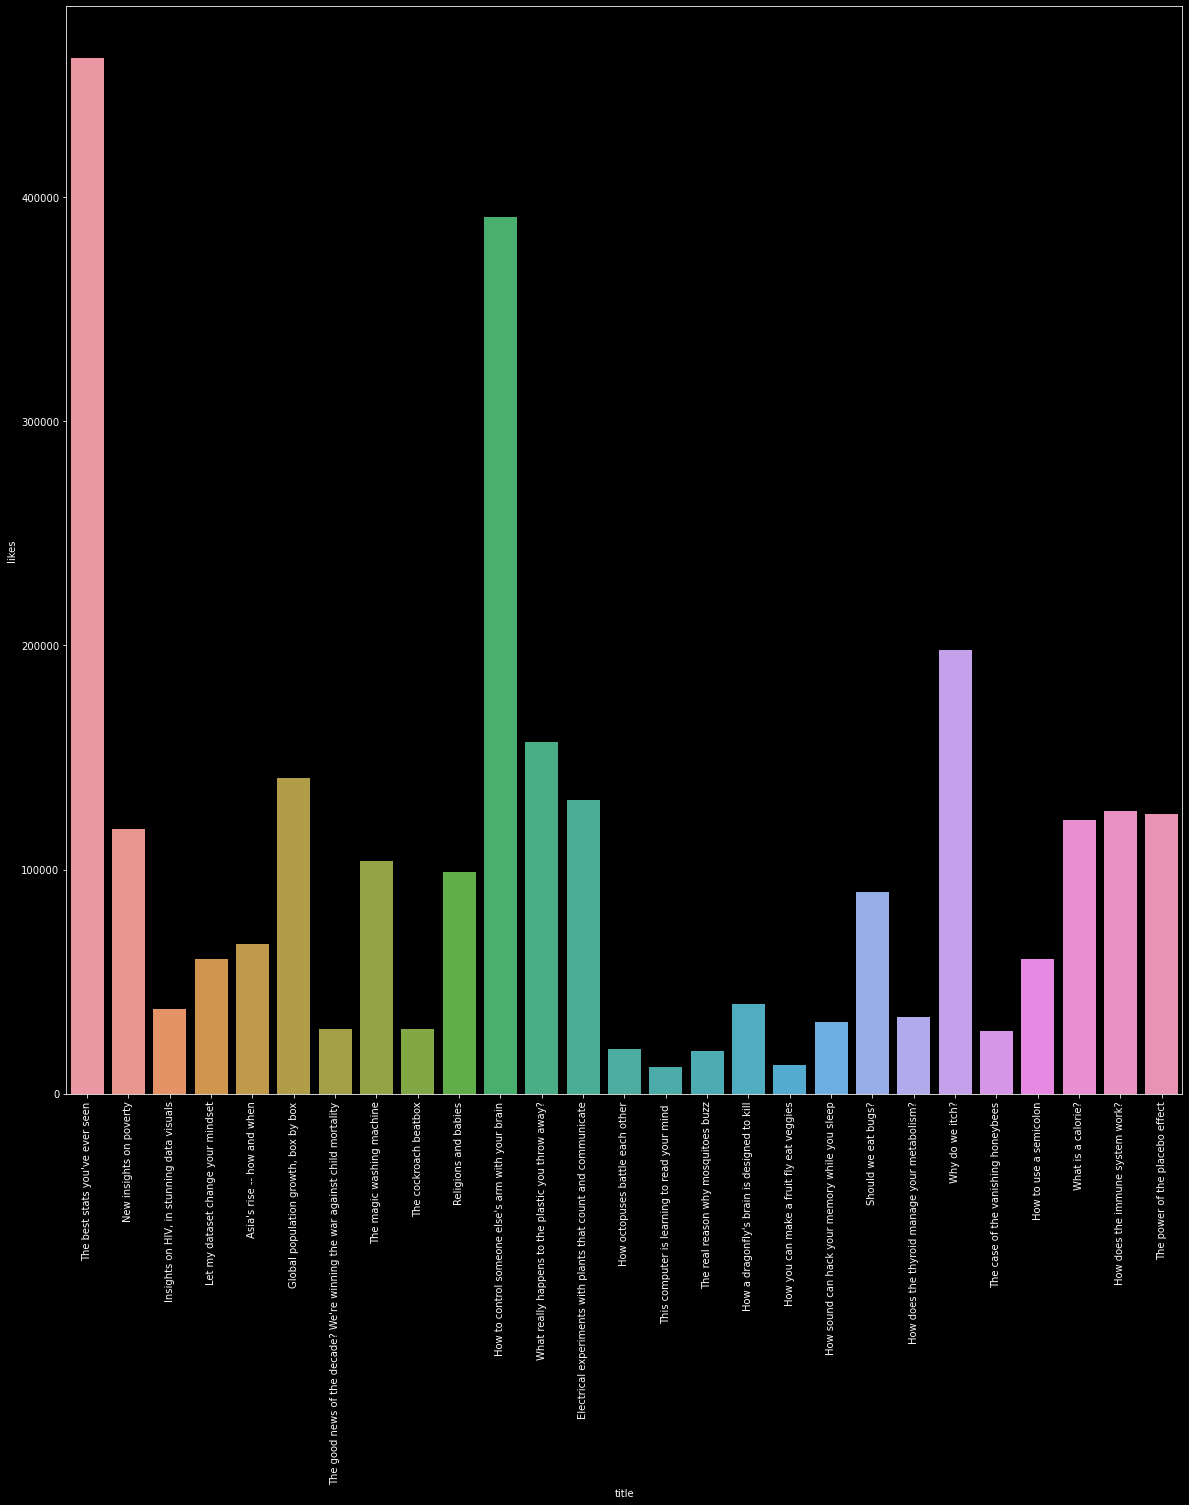

In [55]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20,20)
sns.barplot('title', 'likes', data=Gage_Roslin_Bryce)
plt.xticks(rotation=90)

**Most common events**

In [56]:
events = data['event'].value_counts()
print(events)

TED-Ed                        411
TED2018                       104
TED2019                       101
TED2017                        97
TED2020                        97
                             ... 
Carnegie Mellon University      1
AORN Congress                   1
TEDxEastEnd                     1
TEDActive 2015                  1
TEDxSurrey                      1
Name: event, Length: 625, dtype: int64


In [57]:
events = pd.DataFrame(events)

df = events.reset_index()
df = df.rename(columns={'index': 'event', 'event': 'count'})


In [58]:
df.head(15)

,event,count
0,TED-Ed,411
1,TED2018,104
2,TED2019,101
3,TED2017,97
4,TED2020,97
5,TED2014,84
6,TED2009,83
7,TED2016,76
8,TED2013,75
9,TED2015,75


In [59]:
df = df[:50]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

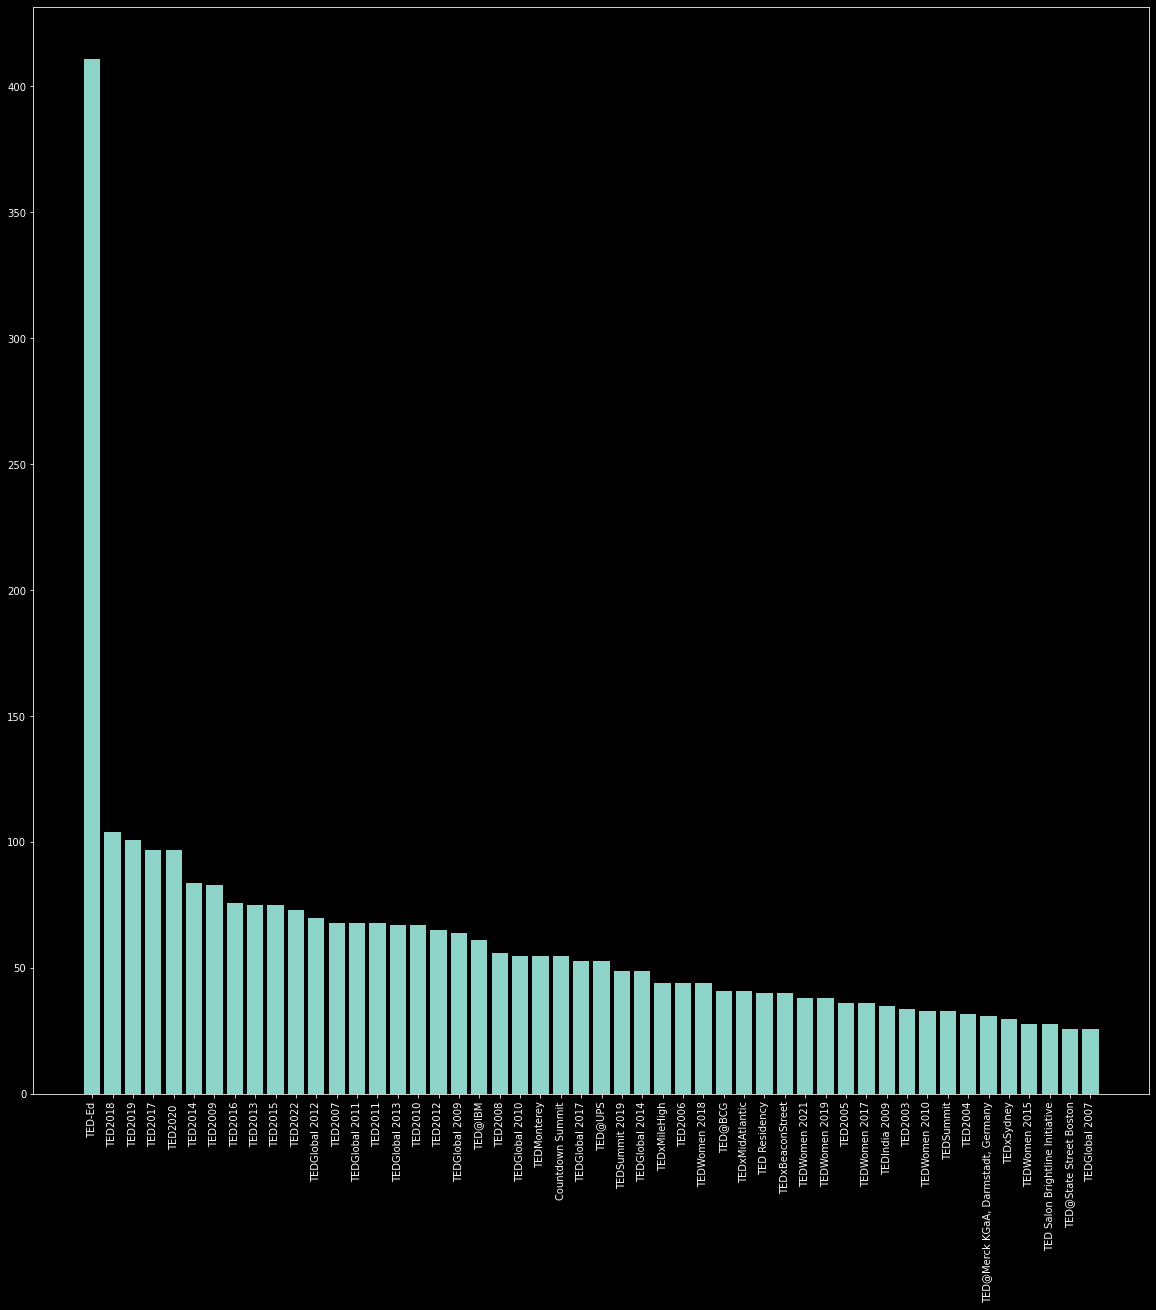

In [60]:
x=df['event']
y=df['count']
plt.bar(x,y)
plt.xticks(rotation=90)


In [61]:
data.describe()

,talk_id,duration,views,likes,like/view_ratio,date_dif,process_time
count,5037.000000,5037.000000,5.037000e+03,5.037000e+03,5037.000000,5037.000000,5037
mean,22081.948183,750.372245,2.212816e+06,6.581798e+04,2.963266,352.911852,352 days 21:53:04.038117928
std,28323.668675,502.563200,3.870578e+06,1.145042e+05,0.039902,647.509245,647 days 12:13:18.808474008
min,1.000000,78.000000,1.286000e+03,3.800000e+01,2.740000,1.000000,1 days 00:00:00
25%,1501.000000,472.000000,7.392170e+05,2.200000e+04,2.950000,51.000000,51 days 00:00:00
50%,2857.000000,726.000000,1.440384e+06,4.300000e+04,2.980000,113.000000,113 days 00:00:00
75%,37746.000000,950.000000,2.218673e+06,6.600000e+04,2.990000,276.000000,276 days 00:00:00
max,98843.000000,20404.000000,7.393596e+07,2.200000e+06,3.000000,13879.000000,13879 days 00:00:00


There is some interesting information in 'duration' column. Min value is 60 while max value is 20404 seconds. This piece of data needs to be evaluated more carefully.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae382adfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae382bd700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae382adc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae382bde20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae382d11f0>],
 'means': []}

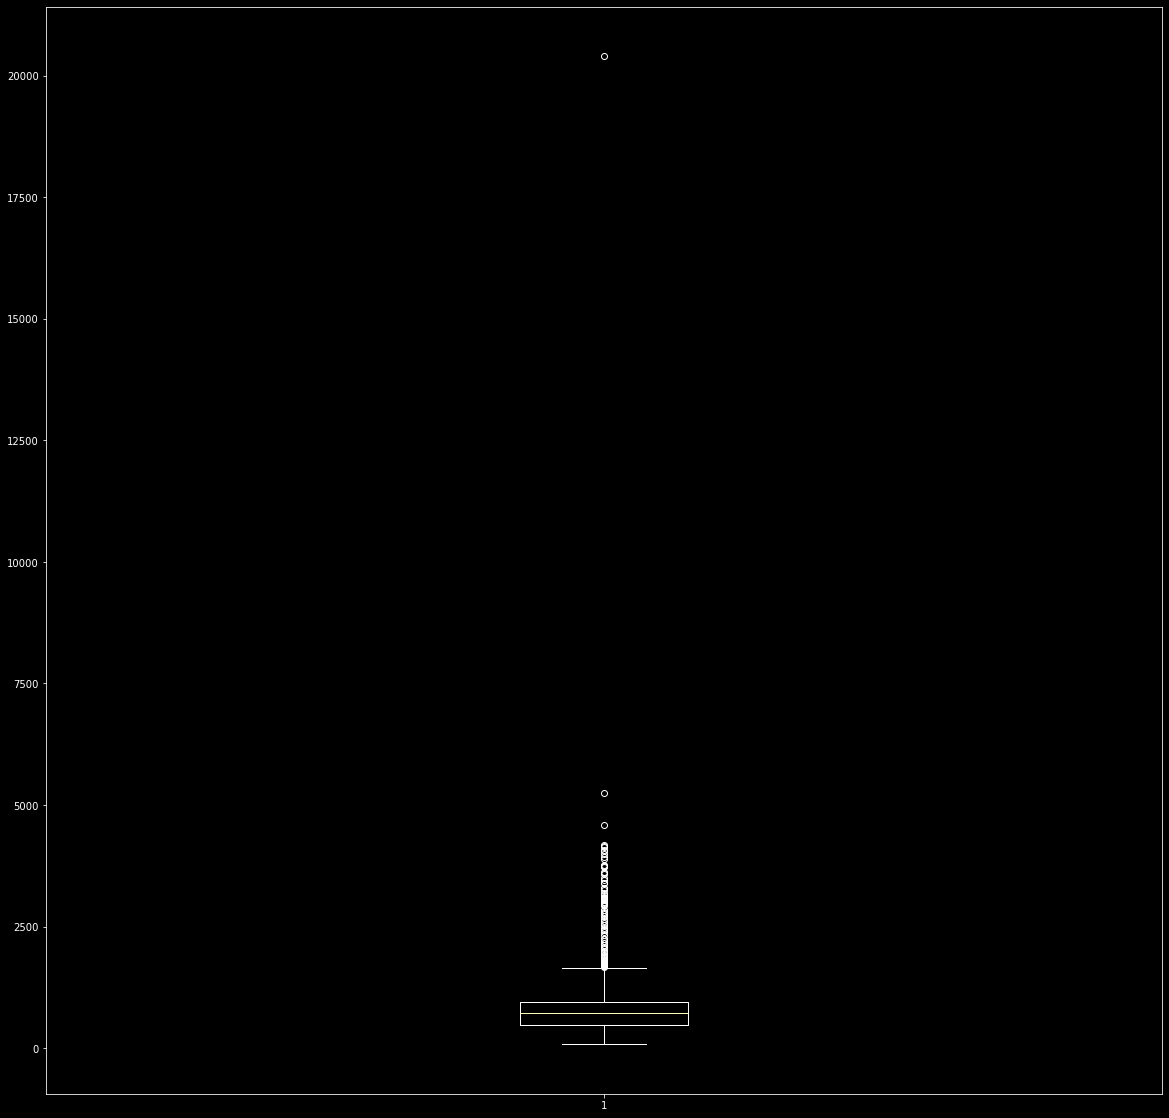

In [62]:
plt.boxplot(data['duration'])

In [63]:
long_duration  = data.loc[data['duration'] > 4000]

In [64]:
long_duration

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio,date_dif,process_time
585,730,Really achieving your childhood dreams,Randy Pausch,2007-09-18,2010-01-08,Carnegie Mellon University,4587,662291,19000,2.87,843.0,843 days
635,798,"Parrots, the universe and everything",Douglas Adams,2001-05-16,2010-03-16,University of California,5257,501014,15000,2.99,3226.0,3226 days
4826,66963,Countdown Session 3: Transformation (Full sess...,Hosted by Jane Fonda and Xiye Bastida,2020-10-10,2020-10-15,Countdown,4080,6550,196,2.99,5.0,5 days
4827,66840,Countdown Session 1: Urgency (Full session),Hosted by Mark Ruffalo and Don Cheadle,2020-10-10,2020-10-15,Countdown,4129,24560,736,3.00,5.0,5 days
4828,67192,Countdown Session 4: Transformation (Full sess...,Hosted by Prajakta Koli and Hannah Stocking,2020-10-10,2020-10-15,Countdown,4059,5794,173,2.99,5.0,5 days
4829,66650,Countdown Session 2: Leadership (Full session),Hosted by Al Gore and Jaden Smith,2020-10-10,2020-10-15,Countdown,4182,9808,294,3.00,5.0,5 days
5068,75257,The race to build AI that benefits humanity wi...,The TED Interview,2021-04-05,2021-04-23,TED Audio Collective,4154,1015026,30000,2.96,18.0,18 days
5334,84370,Countdown Global Launch 2020,TED,2020-10-10,2021-11-23,Countdown,20404,127255,3800,2.99,409.0,409 days


This gives some better understanding. Longest TED videos are actualy countdown livestreams which consist of multiple videos. Another long recording is actually an audio/podcast of 4154s (1 hour 15 min)
Longest video of the single author is "Parrots, the universe and everything" by Douglas Adams:<br> https://www.youtube.com/watch?v=_ZG8HBuDjgc&t=1529s

In [65]:
short_duration  = data.loc[data['duration'] < 1800]

In [66]:
short_duration

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,like/view_ratio,date_dif,process_time
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000,2.99,122.0,122 days
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000,2.98,123.0,123 days
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000,2.99,121.0,121 days
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000,2.99,125.0,125 days
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000,2.98,122.0,122 days
...,...,...,...,...,...,...,...,...,...,...,...,...
5693,98250,The community-building potential of the arts,Lily Yeh,2013-10-10,2022-10-07,TEDxCornellU,1344,8579,257,3.00,3284.0,3284 days
5694,98591,Climate action's hidden opportunities for women,Zineb Sqalli,2022-09-15,2022-10-07,TED@BCG,734,495327,14000,2.83,22.0,22 days
5695,95723,The benefits of not being a jerk to yourself,Dan Harris,2022-04-10,2022-10-10,TED2022,819,574997,17000,2.96,183.0,183 days
5697,98662,4 ways to design a disability-friendly future,Meghan Hussey,2022-09-08,2022-10-11,TED Salon Bezos Scholars,544,310241,9300,3.00,33.0,33 days


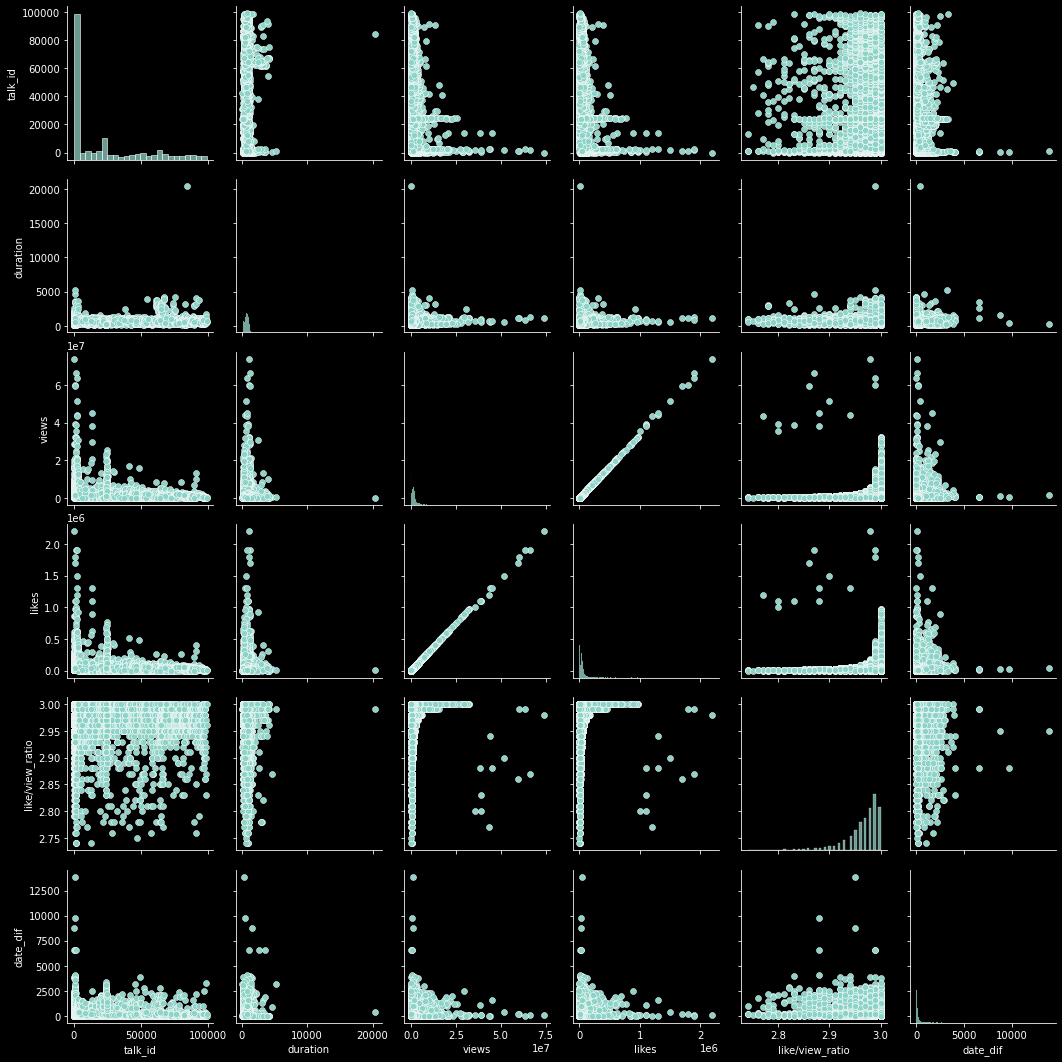

In [67]:
sns.pairplot(data)

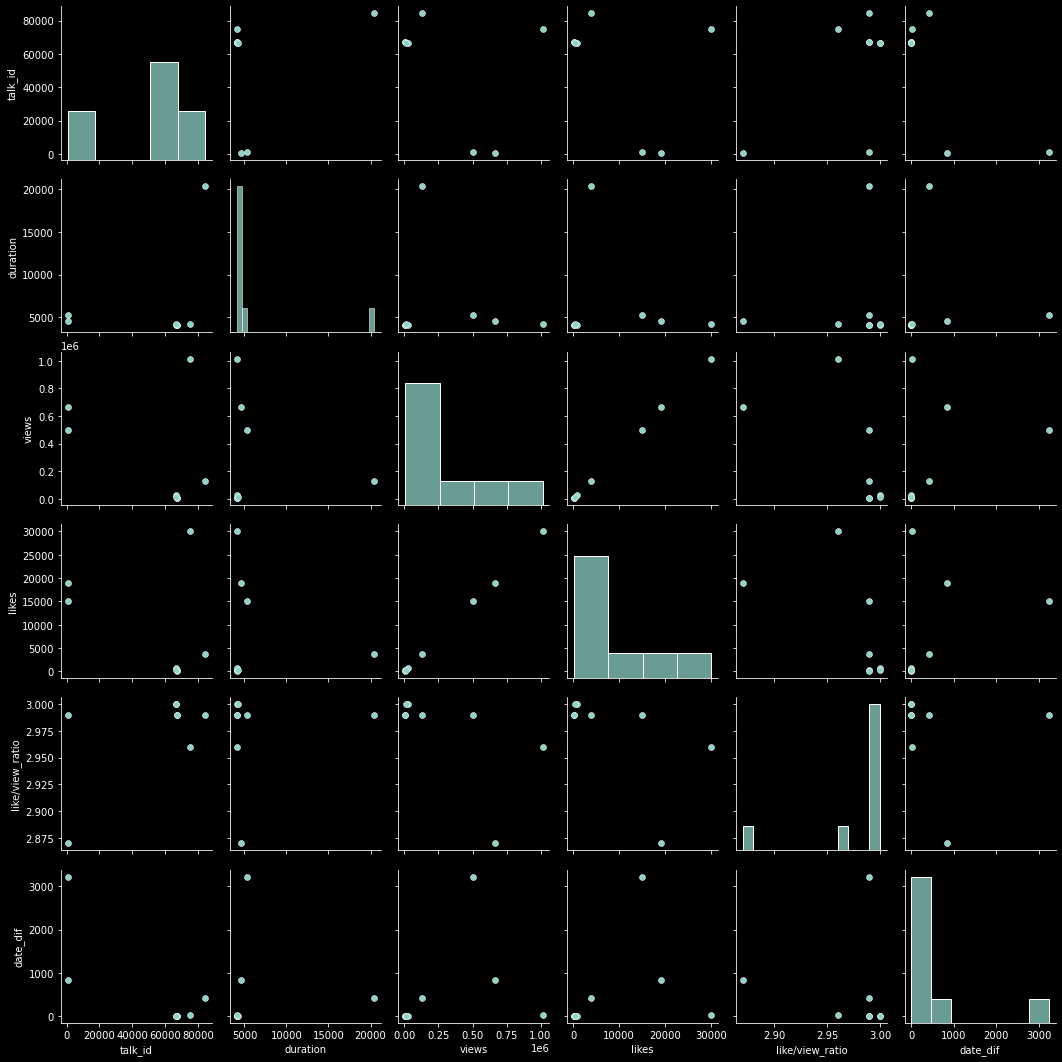

In [68]:
sns.pairplot(long_duration)

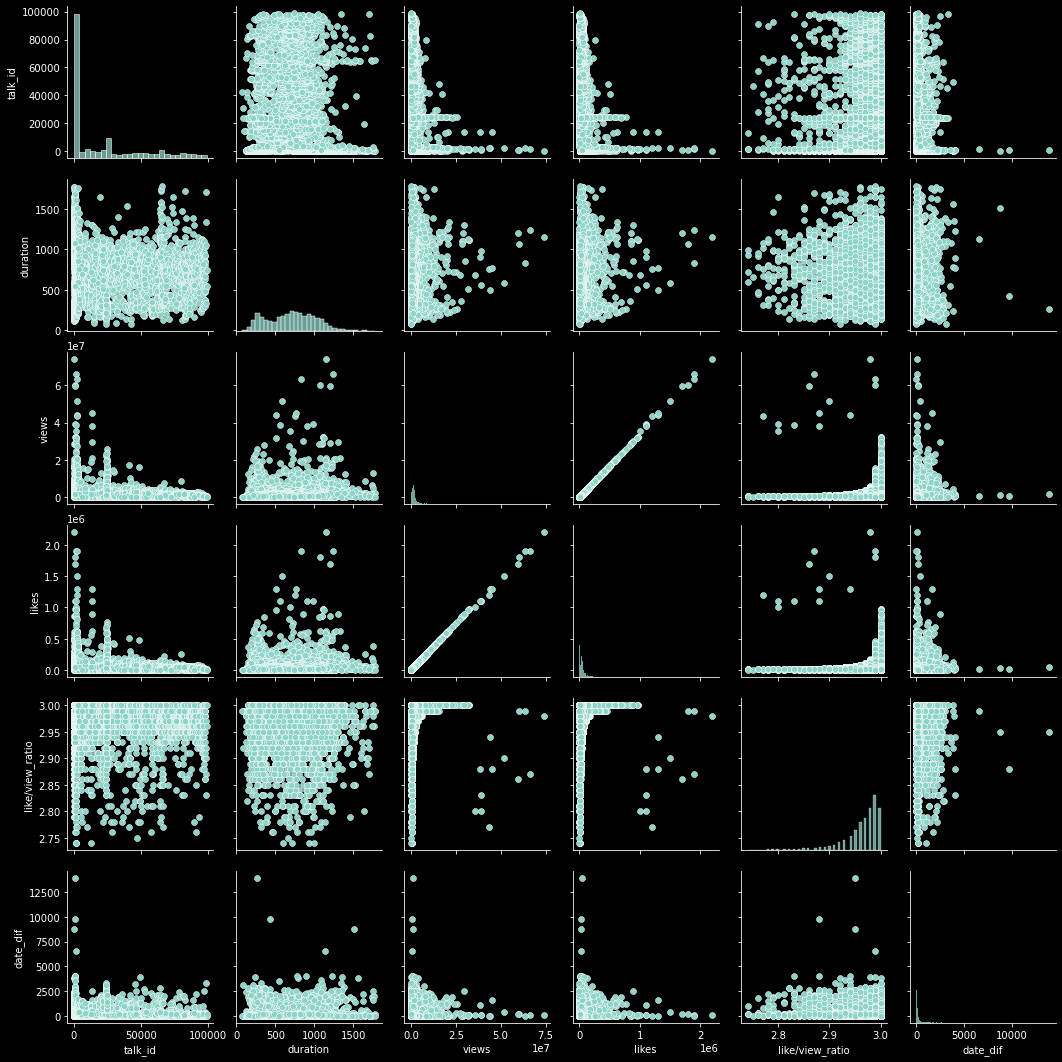

In [69]:
sns.pairplot(short_duration)

Text(0, 0.5, 'Number of Likes')

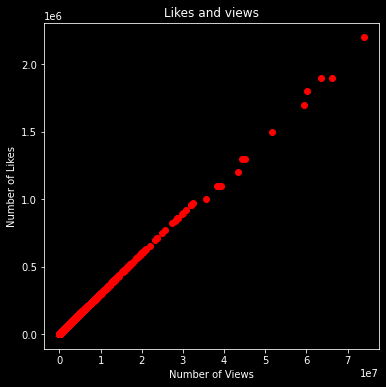

In [77]:
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(data['views'], data['likes'], c='red')
plt.title('Likes and views')
plt.xlabel('Number of Views')
plt.ylabel('Number of Likes')

Text(0, 0.5, 'Number of Views')

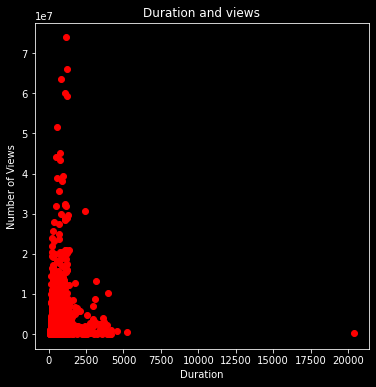

In [80]:
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(data['duration'], data['views'], c='red')
plt.title('Duration and views')
plt.xlabel('Duration')
plt.ylabel('Number of Views')